In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
path = ".\supermarket_sales.csv"

In [5]:
df = pd.read_csv(path)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Some cleaning and new features

In [6]:
duplicates = df.duplicated().reset_index()
duplicates.iloc[:,1].value_counts()

0
False    1000
Name: count, dtype: int64

In [7]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df["Time"] = pd.to_datetime(df["Time"])

C:\Users\Bayle Maxime\AppData\Local\Temp\ipykernel_109592\3795135482.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"] = pd.to_datetime(df["Time"])


In [9]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [10]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-10-06 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-10-06 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-10-06 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-10-06 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-10-06 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
df["Time"][0].hour

13

In [12]:
df['Month']=df['Date'].apply(lambda x: x.month)
df['Weekday']=df['Date'].apply(lambda x: x.weekday())
df['Hour']=df['Time'].apply(lambda x: x.hour)

In [13]:
numerical_features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']

In [14]:
correlation = df[numerical_features].corr()
correlation

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


<Axes: >

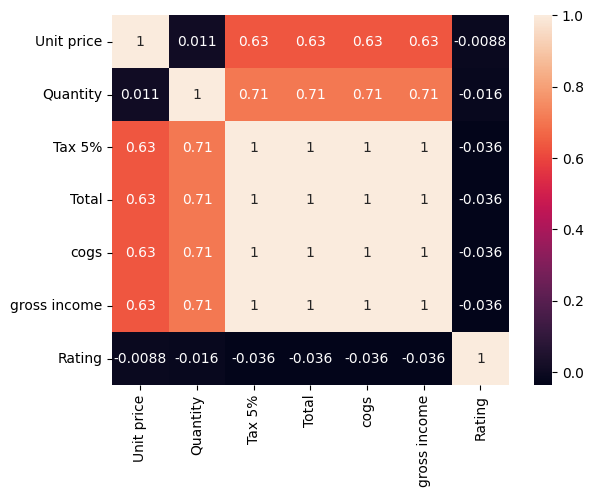

In [15]:
sns.heatmap(correlation, annot=True)

In [16]:
df.isnull().sum().values.sum()

np.int64(0)

In [17]:
def weekname(x):
    if x == 0:
        return 'Monday'
    elif x == 1:
        return 'Tuesday'
    elif x == 2:
        return 'Wednesday'
    elif x == 3:
        return 'Thursday'
    elif x == 4:
        return 'Friday'
    elif x == 5:
        return 'Saturday'
    else:
        return 'Sunday'

In [18]:
df['Week_name'] = df['Weekday'].apply(lambda x: weekname(x))

# Exploring Dataset

### KPI

In [19]:
print("Le dataset recense des données du ",df["Date"].min().date(), " au ", df["Date"].max().date())

Le dataset recense des données du  2019-01-01  au  2019-03-30


In [20]:
print("Le dataset recense: ",df["Invoice ID"].count(), "transactions")

Le dataset recense:  1000 transactions


In [21]:
df["Time"] = df["Time"].apply(lambda x: x.time())

In [22]:
print("Les transactions sont regroupées dans la tranche horaire suivante: ", df["Time"].min(), " - ", df["Time"].max())

Les transactions sont regroupées dans la tranche horaire suivante:  10:00:00  -  20:59:00


In [23]:
sales = round(df["Total"].sum(),2)
total_gross = round(df["gross income"].sum(),2)
margin_percentage = round(total_gross / sales * 100, 2)
print (margin_percentage == round(df["gross margin percentage"].mean(),2))

True


In [24]:
print("some key indicators from the dataset:")
print("- Total Sales:", sales, "$\n- Total Gross income:", total_gross, "$\n- Margin percentage:", margin_percentage,"%")

some key indicators from the dataset:
- Total Sales: 322966.75 $
- Total Gross income: 15379.37 $
- Margin percentage: 4.76 %


### Time trends analysis

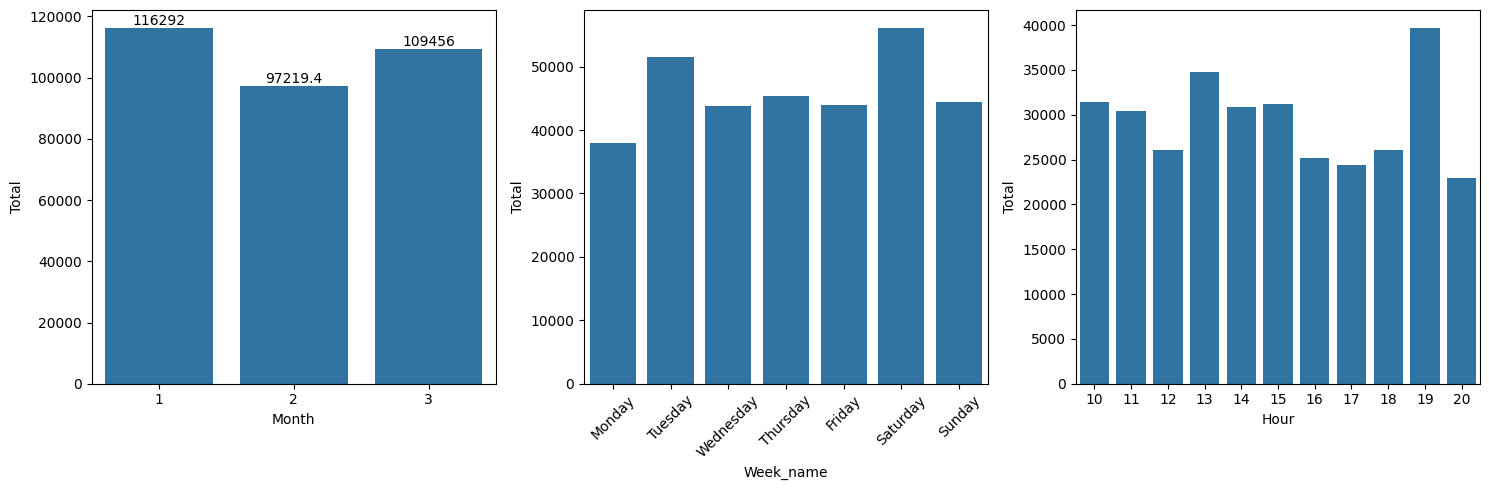

In [25]:
df_month = df.groupby('Month')['Total'].sum().reset_index()
df_week = df[['Weekday', 'Week_name', 'Total']].groupby(['Weekday','Week_name'])['Total'].sum().reset_index().sort_values('Weekday')
df_hour = df.groupby('Hour')['Total'].sum().reset_index()

fig, axs = plt.subplots(1,3,figsize=(15,5))

sns.barplot(data=df_month, x='Month', y='Total', ax=axs[0])
axs[0].bar_label(axs[0].containers[0])

sns.barplot(data=df_week, x='Week_name', y='Total', ax=axs[1])
plt.setp(axs[1].get_xticklabels(), rotation=45)

sns.barplot(data=df_hour, x='Hour', y='Total', ax=axs[2])

plt.tight_layout()
plt.show()

C:\Users\Bayle Maxime\AppData\Local\Temp\ipykernel_109592\1067923578.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_week, x='Week_name', y='Total', palette=colors_week, ax=axs[0])
C:\Users\Bayle Maxime\AppData\Local\Temp\ipykernel_109592\1067923578.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_hour, x='Hour', y='Total', palette=colors_hour, ax=axs[1])


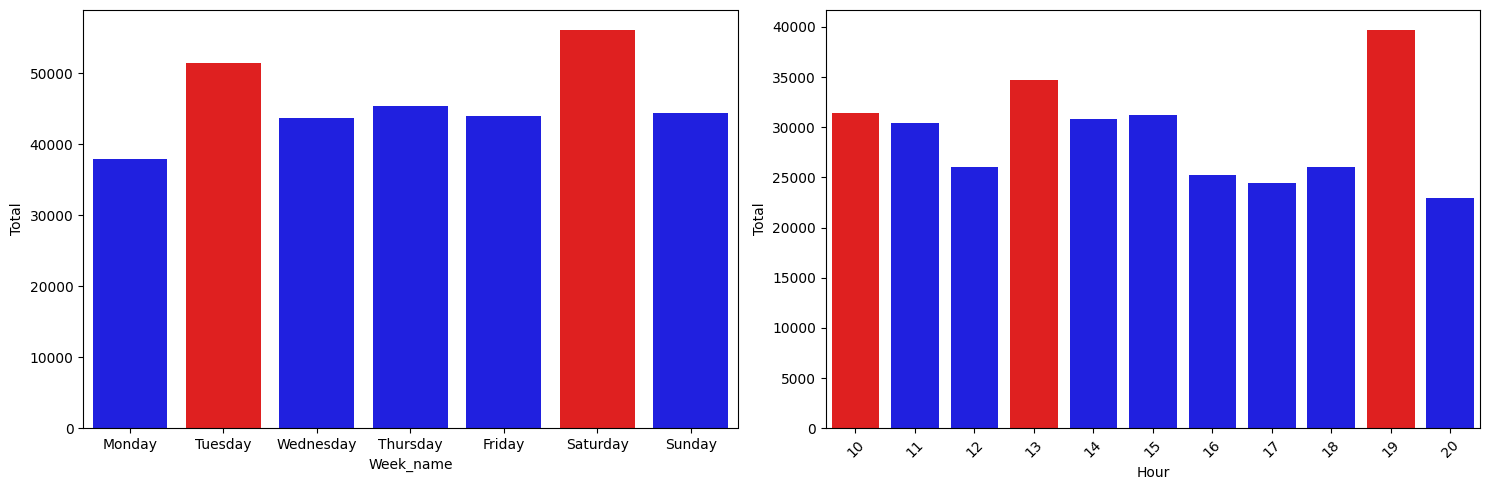

In [26]:
df_week = df[['Weekday', 'Week_name', 'Total']].groupby(['Weekday','Week_name'])['Total'].sum().reset_index().sort_values('Weekday')
df_hour = df.groupby('Hour')['Total'].sum().reset_index()

quantile_80_week = df_week['Total'].quantile(0.8)
quantile_80_hour = df_hour['Total'].quantile(0.8)

colors_week = ['red' if val >= quantile_80_week else 'blue' for val in df_week['Total']]
colors_hour = ['red' if val >= quantile_80_hour else 'blue' for val in df_hour['Total']]

fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.barplot(data=df_week, x='Week_name', y='Total', palette=colors_week, ax=axs[0])
plt.setp(axs[1].get_xticklabels(), rotation=45)

sns.barplot(data=df_hour, x='Hour', y='Total', palette=colors_hour, ax=axs[1])

plt.tight_layout()
plt.show()

### Sales analysis

In [27]:
df["Total"].sum()

np.float64(322966.749)

<Axes: xlabel='Date', ylabel='Total'>

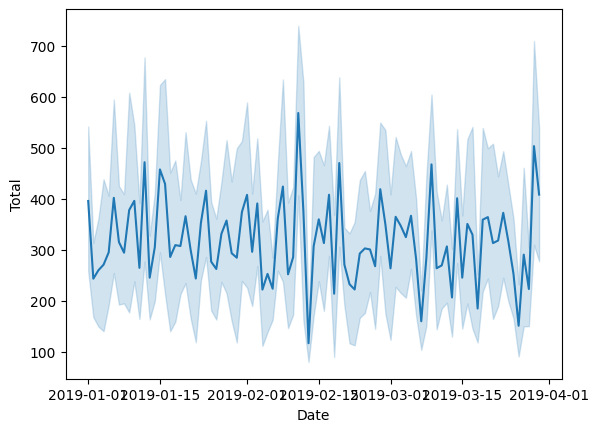

In [28]:
sns.lineplot(data=df, x='Date', y='Total')

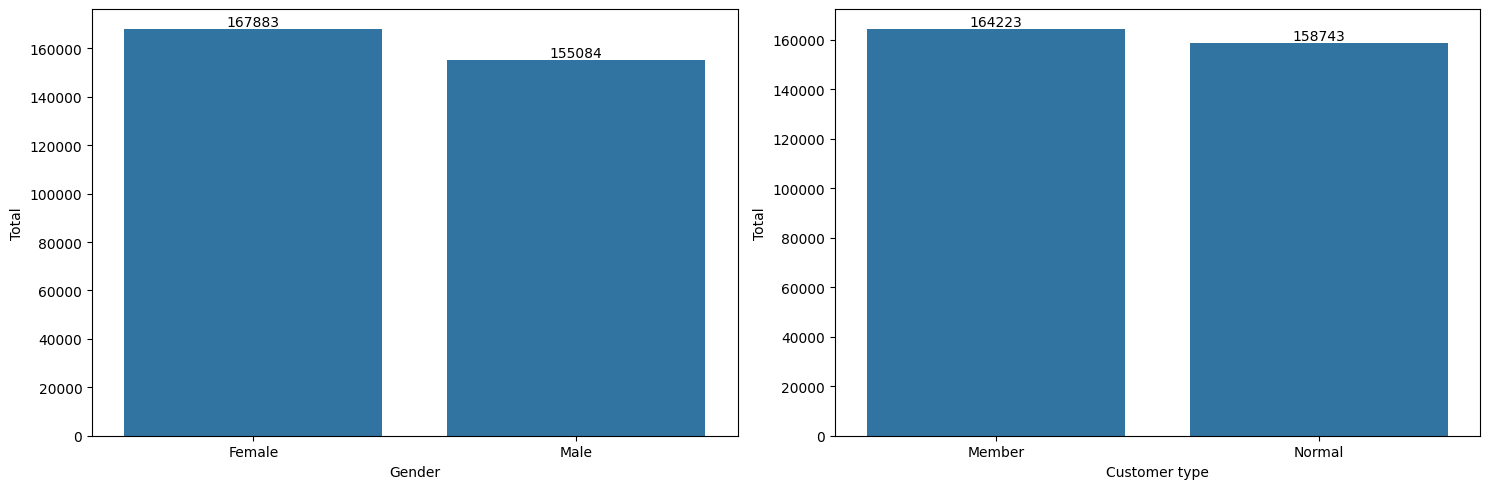

In [29]:
df_gender = df.groupby('Gender')['Total'].sum().reset_index()
df_customer_type = df.groupby('Customer type')['Total'].sum().reset_index()

fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.barplot(data=df_gender, x='Gender', y='Total', ax=axs[0])
axs[0].bar_label(axs[0].containers[0])

sns.barplot(data=df_customer_type, x='Customer type', y='Total', ax=axs[1])
axs[1].bar_label(axs[1].containers[0])

plt.tight_layout()
plt.show()

<Axes: xlabel='Branch', ylabel='Product line'>

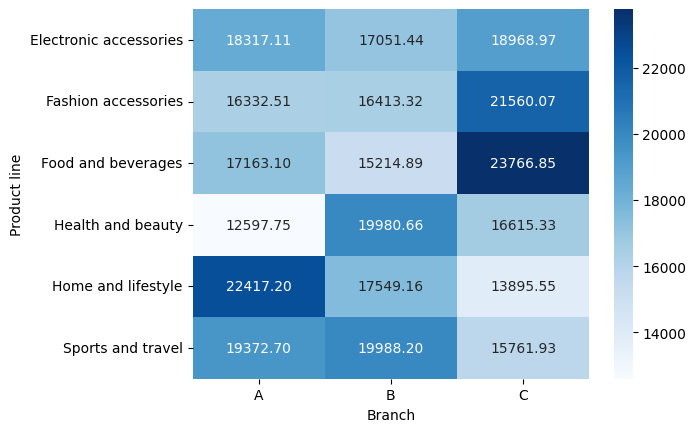

In [30]:
df_branch_product = df.groupby(['Branch','Product line'])['Total'].sum().reset_index()
pivot_table = df_branch_product.pivot_table(values='Total', index='Product line', columns='Branch')
sns.heatmap(data=pivot_table, annot=True, cmap='Blues', fmt='.2f')

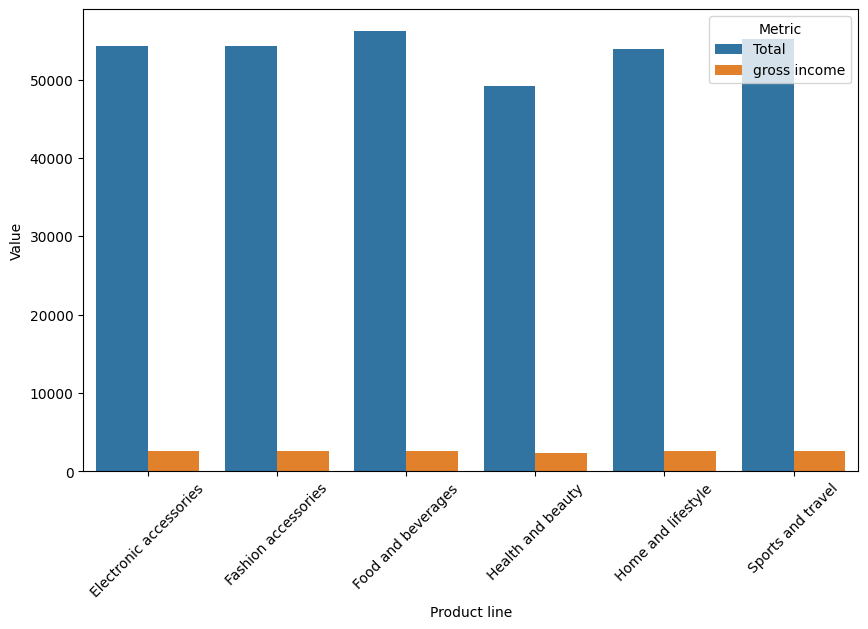

In [31]:
df_products = df.groupby('Product line')[['Total','gross income']].sum().reset_index()

df_melted = df_products.melt(id_vars='Product line', value_vars=['Total','gross income'], var_name='Metric', value_name='Value')

plt.figure(figsize=(10,6))
sns.barplot(df_melted, x='Product line', y='Value', hue='Metric')
plt.xticks(rotation = 45)
plt.show()

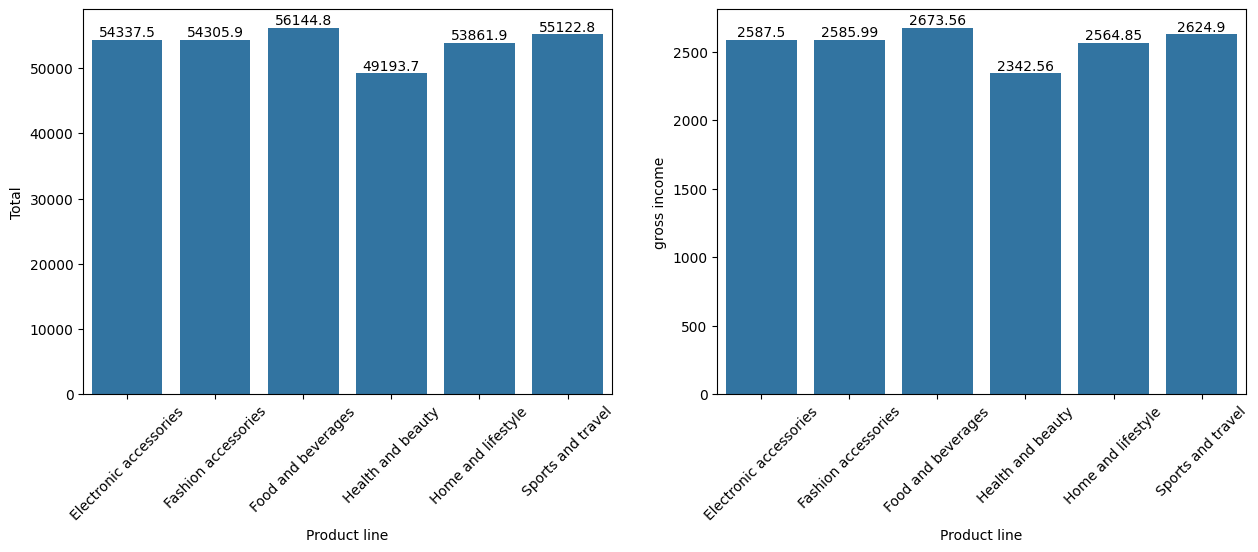

In [32]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.barplot(df_products, x='Product line', y='Total', ax=axs[0])
sns.barplot(df_products, x='Product line', y='gross income', ax=axs[1])
axs[0].bar_label(axs[0].containers[0])
axs[0].tick_params(axis='x', rotation=45)
axs[1].bar_label(axs[1].containers[0])
axs[1].tick_params(axis='x', rotation=45)

plt.show()

<Axes: xlabel='Gender', ylabel='Product line'>

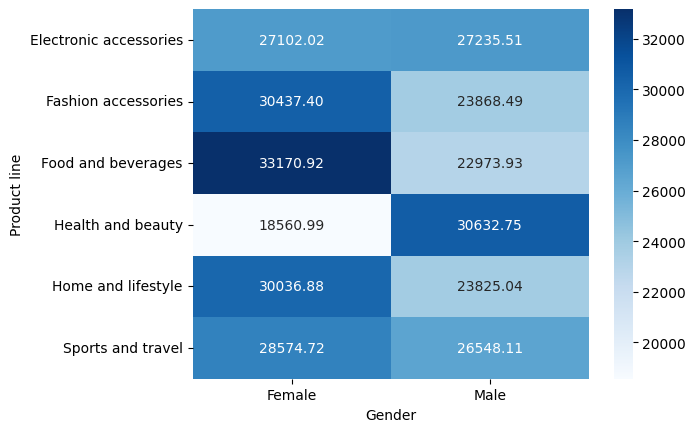

In [33]:
df_gender_product = df.groupby(['Gender','Product line'])['Total'].sum().reset_index()
pivot_table_gender_product = df_gender_product.pivot_table(values='Total', index='Product line', columns='Gender')
sns.heatmap(pivot_table_gender_product, annot=True, cmap='Blues', fmt='.2f')

### Branch sales analysis

C:\Users\Bayle Maxime\AppData\Local\Temp\ipykernel_109592\1441365642.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = pivot_percentage.applymap(lambda x: f'{x:.2f}%')


<Axes: xlabel='Branch', ylabel='Product line'>

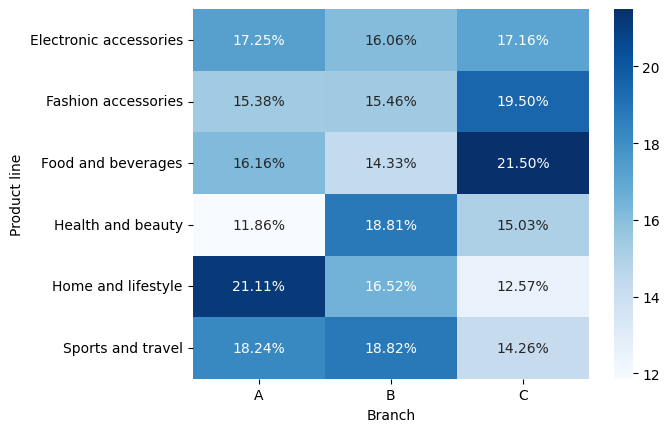

In [34]:
df_branch_product = df.groupby(['Branch','Product line'])['Total'].sum().reset_index()
pivot_table = df_branch_product.pivot_table(values='Total', index='Product line', columns='Branch')
totals_by_branch = pivot_table.sum(axis=0)
pivot_percentage = pivot_table.div(totals_by_branch, axis=1)*100
annot = pivot_percentage.applymap(lambda x: f'{x:.2f}%')
sns.heatmap(data=pivot_percentage, annot=annot, fmt='s', cmap='Blues')

# Other Analysis

In [35]:
df_payment_mode = df.groupby('Payment')['Invoice ID'].count().reset_index()
df_payment_mode.rename(columns={'Invoice ID':'Count'}, inplace=True)
df_payment_mode

,Payment,Count
0,Cash,344
1,Credit card,311
2,Ewallet,345


[Text(0, 0, '344'), Text(0, 0, '311'), Text(0, 0, '345')]

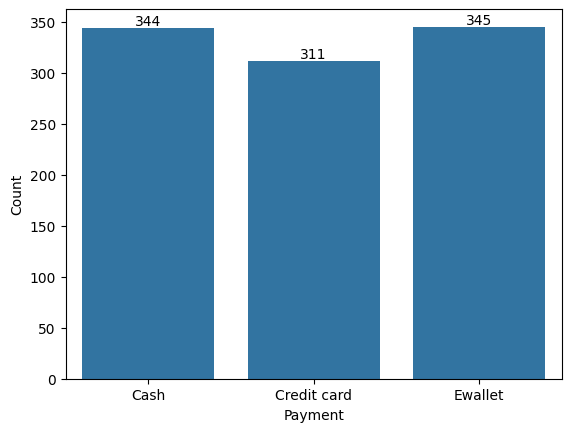

In [36]:
ax = sns.barplot(df_payment_mode, x='Payment', y='Count')
ax.bar_label(ax.containers[0])

In [37]:
def class_total_range(x):
    if x <= 200:
        return "Current"
    elif x <= 600:
        return "High"
    else:
        return "Really High"

In [38]:
df['Purchase type'] = df['Total'].apply(lambda x: class_total_range(x))

In [39]:
df['Purchase type'].value_counts()

Purchase type
High           430
Current        410
Really High    160
Name: count, dtype: int64

In [40]:
df[['Total','Purchase type']].sample(10)

,Total,Purchase type
765,801.8640,Really High
782,32.1510,Current
34,417.5640,High
702,207.5850,High
949,222.0120,High
274,628.1730,Really High
490,72.8700,Current
376,334.3410,High
108,321.1110,High
926,92.7255,Current


<Axes: xlabel='Purchase type', ylabel='Payment'>

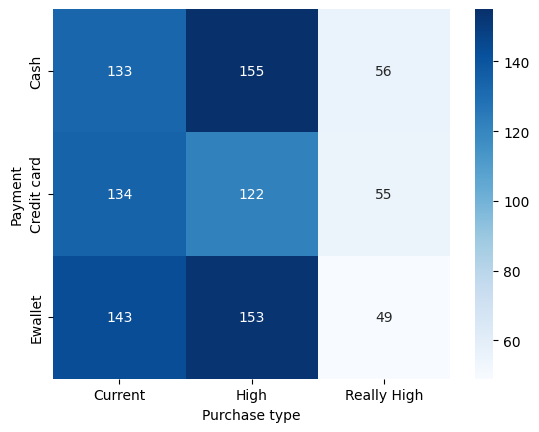

In [41]:
df_type_payment = df.groupby(['Payment', 'Purchase type'])['Invoice ID'].count().reset_index()
df_type_payment.rename(columns={'Invoice ID':'Count'}, inplace=True)
pv_type_payment = df_type_payment.pivot_table(values='Count', index='Payment', columns='Purchase type')
sns.heatmap(pv_type_payment, annot=True, fmt='.0f', cmap='Blues')

<Axes: xlabel='Purchase type', ylabel='Product line'>

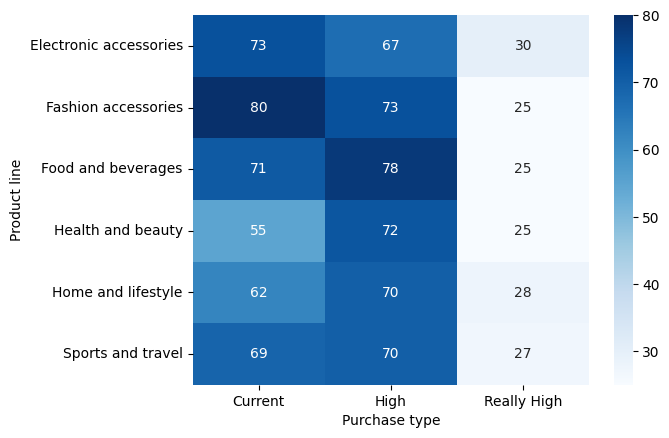

In [42]:
df_type_product = df.groupby(['Purchase type', 'Product line'])['Invoice ID'].count().reset_index()
df_type_product.rename(columns={'Invoice ID':'Count'}, inplace=True)
pv_type_product = df_type_product.pivot_table(values='Count', columns='Purchase type', index='Product line')
sns.heatmap(pv_type_product, annot=True, fmt='.0f', cmap='Blues')

### Rating analysis

<Axes: xlabel='Date', ylabel='Rating'>

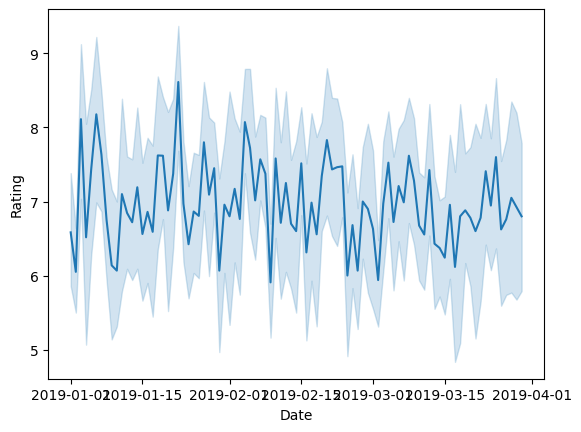

In [43]:
sns.lineplot(df, x='Date', y='Rating')

In [44]:
df_rating_hour = df.groupby('Hour')['Rating'].mean().reset_index()
df_rating_weekday = df.groupby('Product line')['Rating'].mean().reset_index()
df_rating_weekday

,Product line,Rating
0,Electronic accessories,6.924706
1,Fashion accessories,7.029213
2,Food and beverages,7.113218
3,Health and beauty,7.003289
4,Home and lifestyle,6.837500
5,Sports and travel,6.916265


In [45]:
df_test = df.groupby('Product line')['Rating'].mean().reset_index()
avg = df['Rating'].mean()
df_test['Rating'] = (df_test['Rating']-avg)/avg*100
df_test

,Product line,Rating
0,Electronic accessories,-0.688315
1,Fashion accessories,0.810496
2,Food and beverages,2.015265
3,Health and beauty,0.438703
4,Home and lifestyle,-1.938991
5,Sports and travel,-0.809370


In [46]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Weekday,Hour,Week_name,Purchase type
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,5,13,Saturday,High
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,3,4,10,Friday,Current
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,6,13,Sunday,High
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1,6,20,Sunday,High
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2,4,10,Friday,Really High


# Exporting dataset to create the dashboard on Power BI

In [46]:
path = ".\dashboard_supermarket_dataset.csv"

In [48]:
df.to_csv(path)